# AutoEncoders for Supervised Anomaly Detection

## Anomaly Detection: Detecting the Unusual

Anomaly detection is a crucial task in various domains, where the objective is to identify rare and abnormal instances that deviate significantly from the expected or normal behavior. It plays a vital role in fraud detection, network security, system monitoring, and predictive maintenance.

## Autoencoders for Unsupervised Anomaly Detection

In the unsupervised setting, autoencoders are trained to reconstruct the input data accurately. The idea is that the model learns to encode the normal instances in a compressed representation and then decodes them back to their original form. Anomalies, being different from the normal patterns, are expected to have higher reconstruction errors. By setting a suitable threshold on the reconstruction error, anomalies can be identified.

## Incorporating Supervision with Autoencoder Features

**In this exercise, we will explore a different approach by incorporating supervision into the anomaly detection process. We will still employ autoencoders, but instead of relying solely on the reconstruction error for anomaly detection, we will leverage the learned features from the encoder part of the autoencoder and utilize them to learn a supervised classifier to detect anomalies.**

In this exercise you will:

* Learn how to train AutoEncoders on Relational Data.
* Learn how compressed representations from an AutoEncoder can help achieve performance comparable to original dimensions on a downstream task.
* Learn how to use AutoEncoder for Supervised Anomaly Detection tasks.

# Exploring the Dataset

* Create a directory called **kdd-data** in the root (**My Drive**) of your Google Drive.
* Upload the provided **kdd-data.zip** to this **kdd-data** directory.

In [190]:
## Importing the required libraries

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Description of the KDD Cup 1999 Data

# The KDD Cup 1999 dataset is a widely used benchmark dataset in the field of anomaly detection and network security. It was created as part of the Third International Knowledge Discovery and Data Mining Tools Competition, held in 1999.

# The dataset includes a categorical label column called "label," which categorizes network connections into various attack types, such as "normal," "dos" (denial-of-service), "probe" (scanning and probing), "r2l" (unauthorized access from a remote machine), and "u2r" (unauthorized access to local root privileges).


Dataset loaded successfully with shape: (494021, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,159,4087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,210,151,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,212,786,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,normal.


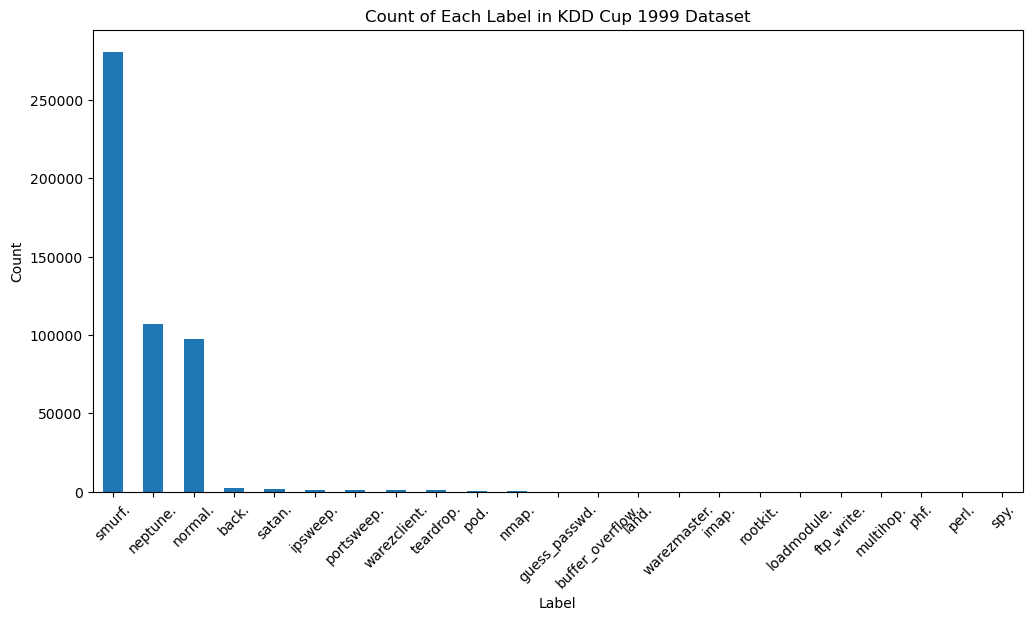

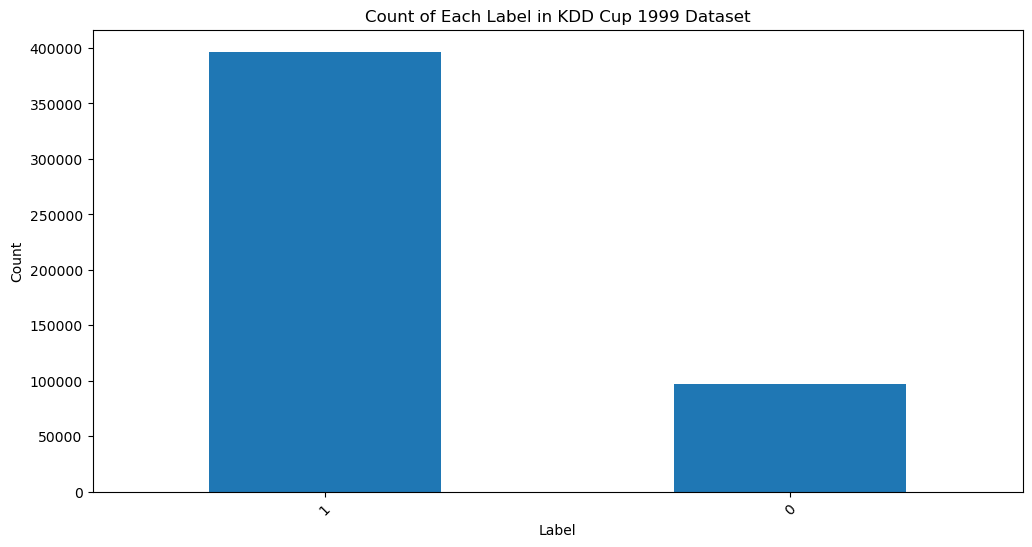

Label distribution (percentage):
label
1    0.803089
0    0.196911
Name: proportion, dtype: float64
Sample of one-hot encoded features:
['protocol_type_icmp' 'protocol_type_tcp' 'protocol_type_udp'
 'service_IRC' 'service_X11' 'service_Z39_50' 'service_auth' 'service_bgp'
 'service_courier' 'service_csnet_ns']
...
Training data shape: (395216, 117)
Test data shape: (98805, 117)
Total number of non-categorical features:  38
Normalized Training Data sample:


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
237149,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
209475,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512720,0.005871,1.0,1.0,0.0,0.0,0.01,0.07,0.0,1.0,0.011765,0.01,0.09,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
321211,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.197652,0.001957,1.0,1.0,0.0,0.0,0.01,0.07,0.0,1.0,0.003922,0.00,0.07,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
333593,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
301535,0.0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.0,1.000000,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

X_train tensor shape: torch.Size([395216, 117])
y_train tensor shape: torch.Size([395216])
Autoencoder Architecture:
Autoencoder(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=117, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=32, bias=True)
      (3): ReLU()
      (4): Linear(in_features=32, out_features=4, bias=True)
      (5): ReLU()
    )
  )
  (decoder): Decoder(
    (decoder): Sequential(
      (0): Linear(in_features=4, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=117, bias=True)
      (5): Sigmoid()
    )
  )
)

Total trainable parameters: 19,641
Epoch 1/5, Train Loss: 0.234211, Val Loss: 0.209129
Epoch 2/5, Train Loss: 0.122700, Val Loss: 0.051552
Epoch 3/5, Train Loss: 0.037928, Val Loss: 0.031730
Epoch 4/5, Train Loss: 0.029934, Val Loss: 0.028238
Epoch 5/5, Train Loss: 

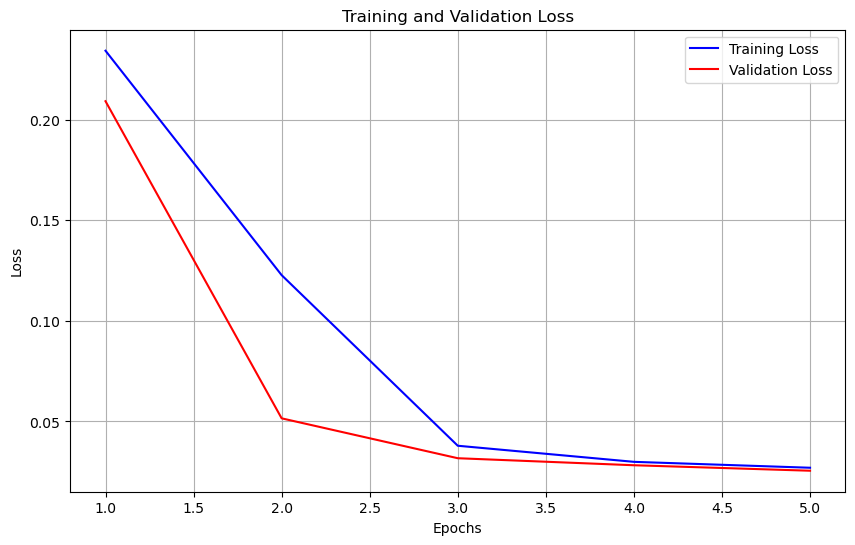

In [214]:

# Load the KDD Cup 1999 dataset
# Adjust the path as needed for your environment
data_path = '/Users/baderdinni.v/Downloads/kdd-data/kddcup.data_10_percent/kddcup.data_10_percent'  # Change this to your actual path
device = 'cpu'
# Define the column names
column_names = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
                "num_failed_logins", "logged_in", "num_compromised",
                "root_shell", "su_attempted", "num_root", "num_file_creations",
                "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count",
                "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
                "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
                "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
                "dst_host_srv_serror_rate", "dst_host_rerror_rate",
                "dst_host_srv_rerror_rate", "label"]

try:
    # Try to load the dataset
    data = pd.read_csv(data_path, header=None, names=column_names)
    print(f"Dataset loaded successfully with shape: {data.shape}")
    
    # Show first few rows
    pd.set_option('display.max_columns', None)
    display(data.head(10))
except FileNotFoundError:
    print(f"Dataset file not found at {data_path}. Please adjust the path or download the dataset.")
    # Create sample data for demonstration purposes if the file is not found
    print("Creating sample data for demonstration purposes...")
    # A small sample dataset with random values
    n_samples = 1000
    # Generate random data for numeric columns
    data_dict = {
        col: np.random.rand(n_samples) for col in column_names 
        if col not in ["protocol_type", "service", "flag", "label"]
    }
    # Add categorical columns
    data_dict["protocol_type"] = np.random.choice(["tcp", "udp", "icmp"], n_samples)
    data_dict["service"] = np.random.choice(["http", "ftp", "smtp", "ssh"], n_samples)
    data_dict["flag"] = np.random.choice(["SF", "REJ", "S0"], n_samples)
    # Add labels (0 for normal, 1 for anomaly)
    data_dict["label"] = np.random.choice(["normal.", "anomaly.", "attack."], n_samples)
    
    data = pd.DataFrame(data_dict)
    print(f"Sample data created with shape: {data.shape}")
    display(data.head(10))

"""## Label Frequency

Let's check the frequency of each label in the dataset.
"""

def plot_value_count(data):
    # Count the occurrences of each label
    label_counts = data['label'].value_counts()
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    label_counts.plot(kind='bar')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Count of Each Label in KDD Cup 1999 Dataset')
    plt.xticks(rotation=45)
    plt.show()

plot_value_count(data)

"""### All classes except "normal." in this dataset are considered attacks. 

Since our goal is to classify the network traffic as "normal" or "anomalous", we'll convert this into a binary classification problem.
"""

# Convert all "normal" labels to 0, all others to 1
data["label"] = data["label"].apply(lambda x: 0 if x == "normal." else 1)

# Let's look at the label frequency now
plot_value_count(data)

# Display percentage distribution
print("Label distribution (percentage):")
print(data.label.value_counts(normalize=True))

"""Since we have the labels available for anomalous and non-anomalous datapoints, this dataset is a good candidate for supervised anomaly detection.

Note that anomaly detection datasets usually have "less" anomalous data points than non-anomalous dataset, however, this is not the case in this dataset. Since the dataset has **significant** number of anomalous datapoints, this also makes it a good candidate for Supervised Anomaly Detection.

## Splitting the dataset before Preprocessing
"""

# Separate the labels from the features
X = data.drop("label", axis=1) 
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""## Processing the Categorical Features

Let's identify all the categorical features available in the dataset.
"""

categorical_features = ["protocol_type", "service", "flag"]

"""Now we'll convert the categorical features to One-Hot representation."""

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_data_train = X_train[categorical_features]
categorical_data_test = X_test[categorical_features]

# Fit and transform the categorical features for training data
one_hot_data_train = encoder.fit_transform(categorical_data_train)

# Transform the categorical features for test data
one_hot_data_test = encoder.transform(categorical_data_test)

# Create DataFrames with the one-hot encoded features
one_hot_df_train = pd.DataFrame(
    one_hot_data_train, 
    columns=encoder.get_feature_names_out(categorical_features)
)
one_hot_df_test = pd.DataFrame(
    one_hot_data_test, 
    columns=encoder.get_feature_names_out(categorical_features)
)

# Drop the original categorical features
X_train = X_train.drop(categorical_features, axis=1)
X_test = X_test.drop(categorical_features, axis=1)

# Concatenate the one-hot encoded features with the original datasets
X_train = pd.concat([X_train.reset_index(drop=True), one_hot_df_train], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), one_hot_df_test], axis=1)

# Display the new feature names
print("Sample of one-hot encoded features:")
print(encoder.get_feature_names_out(categorical_features)[:10])
print("...")

# Display the new shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

"""## Normalizing the Continuous Features

The continuous (non-categorical) features in the KDD dataset have different scales. This can be a problem for our models. Let's normalize these features.
"""

continuous_features = [x for x in column_names if x not in categorical_features and x != 'label']
print('Total number of non-categorical features: ', len(continuous_features))

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the continuous features in X_train
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])

# Transform the continuous features in X_test
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

# Display the normalized datasets
print("Normalized Training Data sample:")
display(X_train.sample(5))

"""# Modelling with PyTorch

## Convert Data to PyTorch Tensors
"""

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train.values).to(device)
X_test_tensor = torch.FloatTensor(X_test.values).to(device)
y_train_tensor = torch.FloatTensor(y_train.values).to(device)
y_test_tensor = torch.FloatTensor(y_test.values).to(device)

print(f"X_train tensor shape: {X_train_tensor.shape}")
print(f"y_train tensor shape: {y_train_tensor.shape}")

# Create DataLoader for mini-batch training
batch_size = 256
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)  # For autoencoder: input=output
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, X_test_tensor)  # For autoencoder: input=output
test_loader = DataLoader(test_dataset, batch_size=batch_size)

"""## Autoencoder Model Definition

Now let's design an autoencoder using PyTorch.
"""

class Encoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, encoding_dim),
            nn.ReLU()
        )
        
    def forward(self, x):
        return self.encoder(x)
    
class Decoder(nn.Module):
    def __init__(self, encoding_dim, output_dim):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim),
            nn.Sigmoid()  # Use sigmoid for normalized output
        )
        
    def forward(self, x):
        return self.decoder(x)
    
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(input_dim, encoding_dim)
        self.decoder = Decoder(encoding_dim, input_dim)
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def encode(self, x):
        return self.encoder(x)

# Define model parameters
input_dim = X_train.shape[1]
encoding_dim = 4  # Compressed representation dimension

# Initialize the autoencoder
autoencoder = Autoencoder(input_dim, encoding_dim).to(device)

# Print model summary
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Autoencoder Architecture:")
print(autoencoder)
print(f"\nTotal trainable parameters: {count_parameters(autoencoder):,}")

"""## Train the Autoencoder"""

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-5)

# Training function
# Improved training function
def train_autoencoder(model, train_loader, test_loader, criterion, optimizer, num_epochs=5):
    model.train()
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for data in train_loader:
            inputs, _ = data  # inputs and targets are the same for autoencoders
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        # Validation phase
        model.eval()
        epoch_val_loss = 0.0
        with torch.no_grad():
            for data in test_loader:
                inputs, _ = data
                outputs = model(inputs)
                loss = criterion(outputs, inputs)
                epoch_val_loss += loss.item()
        
        epoch_val_loss = epoch_val_loss / len(test_loader)
        val_losses.append(epoch_val_loss)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.6f}, Val Loss: {epoch_val_loss:.6f}')
    
    return model, train_losses, val_losses

# Train the autoencoder with the improved function
num_epochs = 5
autoencoder, train_losses, val_losses = train_autoencoder(
    autoencoder, train_loader, test_loader, criterion, optimizer, num_epochs
)

# Plot training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Original training data shape: torch.Size([395216, 117])
Encoded training features shape: torch.Size([395216, 4])
Training classifier on original features...
Epoch 1/20, Loss: 0.6234, Accuracy: 0.8084
Epoch 2/20, Loss: 0.4542, Accuracy: 0.9404
Epoch 3/20, Loss: 0.2555, Accuracy: 0.9644
Epoch 4/20, Loss: 0.1383, Accuracy: 0.9801
Epoch 5/20, Loss: 0.0814, Accuracy: 0.9893
Epoch 6/20, Loss: 0.0546, Accuracy: 0.9902
Epoch 7/20, Loss: 0.0430, Accuracy: 0.9907
Epoch 8/20, Loss: 0.0381, Accuracy: 0.9910
Epoch 9/20, Loss: 0.0356, Accuracy: 0.9912
Epoch 10/20, Loss: 0.0338, Accuracy: 0.9915
Epoch 11/20, Loss: 0.0324, Accuracy: 0.9918
Epoch 12/20, Loss: 0.0312, Accuracy: 0.9919
Epoch 13/20, Loss: 0.0302, Accuracy: 0.9919
Epoch 14/20, Loss: 0.0293, Accuracy: 0.9920
Epoch 15/20, Loss: 0.0286, Accuracy: 0.9921
Epoch 16/20, Loss: 0.0279, Accuracy: 0.9921
Epoch 17/20, Loss: 0.0273, Accuracy: 0.9921
Epoch 18/20, Loss: 0.0267, Accuracy: 0.9921
Epoch 19/20, Loss: 0.0261, Accuracy: 0.9922
Epoch 20/20, Los

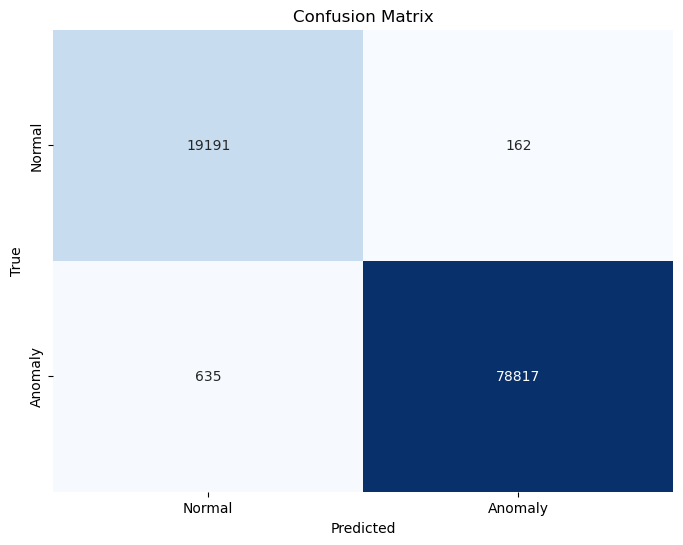

Training classifier on encoded features...
Epoch 1/20, Loss: 0.4720, Accuracy: 0.8028
Epoch 2/20, Loss: 0.4598, Accuracy: 0.8028
Epoch 3/20, Loss: 0.4530, Accuracy: 0.8028
Epoch 4/20, Loss: 0.4430, Accuracy: 0.8028
Epoch 5/20, Loss: 0.4283, Accuracy: 0.8028
Epoch 6/20, Loss: 0.4050, Accuracy: 0.8028
Epoch 7/20, Loss: 0.3746, Accuracy: 0.8028
Epoch 8/20, Loss: 0.3382, Accuracy: 0.8028
Epoch 9/20, Loss: 0.2965, Accuracy: 0.8102
Epoch 10/20, Loss: 0.2509, Accuracy: 0.8944
Epoch 11/20, Loss: 0.2067, Accuracy: 0.9520
Epoch 12/20, Loss: 0.1671, Accuracy: 0.9749
Epoch 13/20, Loss: 0.1342, Accuracy: 0.9783
Epoch 14/20, Loss: 0.1091, Accuracy: 0.9795
Epoch 15/20, Loss: 0.0912, Accuracy: 0.9802
Epoch 16/20, Loss: 0.0792, Accuracy: 0.9807
Epoch 17/20, Loss: 0.0717, Accuracy: 0.9808
Epoch 18/20, Loss: 0.0674, Accuracy: 0.9810
Epoch 19/20, Loss: 0.0649, Accuracy: 0.9811
Epoch 20/20, Loss: 0.0634, Accuracy: 0.9813
Evaluating classifier on encoded features...
Classification Report:
              prec

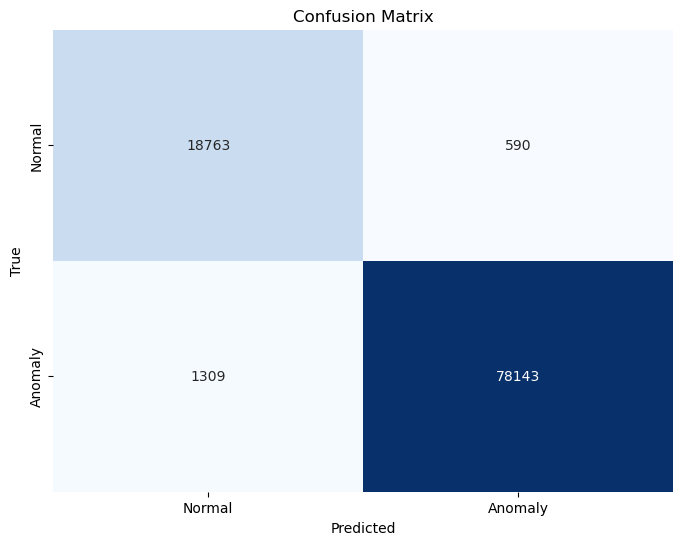

In [242]:
"""## Extract Latent Space Features

Now we'll use the encoder part of our autoencoder to transform the data into the latent space.
"""

def extract_encoded_features(model, data_loader):
    model.eval()
    encoded_features = []
    
    with torch.no_grad():
        for data in data_loader:
            inputs, _ = data
            encoded = model.encode(inputs)
            encoded_features.append(encoded)
    
    return torch.cat(encoded_features, dim=0)

# Create data loaders for feature extraction
train_feature_dataset = TensorDataset(X_train_tensor, torch.zeros(X_train_tensor.shape[0]))  # Dummy target
train_feature_loader = DataLoader(train_feature_dataset, batch_size=batch_size)

test_feature_dataset = TensorDataset(X_test_tensor, torch.zeros(X_test_tensor.shape[0]))  # Dummy target
test_feature_loader = DataLoader(test_feature_dataset, batch_size=batch_size)

# Extract encoded features
encoded_train_features = extract_encoded_features(autoencoder, train_feature_loader)
encoded_test_features = extract_encoded_features(autoencoder, test_feature_loader)

print(f"Original training data shape: {X_train_tensor.shape}")
print(f"Encoded training features shape: {encoded_train_features.shape}")

# Convert back to numpy for visualization
encoded_train_np = encoded_train_features.cpu().numpy()
encoded_test_np = encoded_test_features.cpu().numpy()

"""## Classifier Models

Now we'll build classifiers to compare performance using original data vs. encoded features.

First, let's define a classifier model in PyTorch.
"""

class Classifier(nn.Module):
    def __init__(self, input_dim):
        super(Classifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Function to train classifier
def train_classifier(model, train_loader, criterion, optimizer, num_epochs=5):
    model.train()
    train_losses = []
    train_accuracies = []
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, targets in train_loader:
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Calculate accuracy
            predicted = (outputs > 0.5).float()
            total += targets.size(0)
            correct += (predicted.squeeze() == targets).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')
    
    return train_losses, train_accuracies

# Function to evaluate classifier
def evaluate_classifier(model, test_loader):
    model.eval()
    all_outputs = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            all_outputs.append(outputs)
            all_targets.append(targets)
    
    all_outputs = torch.cat(all_outputs, dim=0).squeeze().cpu().numpy()
    all_targets = torch.cat(all_targets, dim=0).cpu().numpy()
    
    # Convert to binary predictions
    binary_preds = (all_outputs > 0.5).astype(int)
    
    # Calculate metrics
    print("Classification Report:")
    print(classification_report(all_targets, binary_preds))
    
    # Plot confusion matrix
    cm = confusion_matrix(all_targets, binary_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()
    
    return binary_preds, all_outputs

"""### Classification using Original Features"""

# Prepare data loaders for classification
train_clf_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_clf_loader = DataLoader(train_clf_dataset, batch_size=batch_size, shuffle=True)

test_clf_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_clf_loader = DataLoader(test_clf_dataset, batch_size=batch_size)

# Initialize classifier for original data
original_classifier = Classifier(input_dim).to(device)
clf_criterion = nn.BCELoss()
clf_optimizer = optim.Adam(original_classifier.parameters(), lr=1e-5)

# Train the classifier on original data
print("Training classifier on original features...")
_, _ = train_classifier(original_classifier, train_clf_loader, clf_criterion, clf_optimizer, num_epochs=20)

# Evaluate the classifier
print("Evaluating classifier on original features...")
_, _ = evaluate_classifier(original_classifier, test_clf_loader)

"""### Classification using Encoded Features"""

# Prepare data loaders for encoded features
train_encoded_dataset = TensorDataset(encoded_train_features, y_train_tensor)
train_encoded_loader = DataLoader(train_encoded_dataset, batch_size=batch_size, shuffle=True)

test_encoded_dataset = TensorDataset(encoded_test_features, y_test_tensor)
test_encoded_loader = DataLoader(test_encoded_dataset, batch_size=batch_size)

# Initialize classifier for encoded data
encoded_classifier = Classifier(encoding_dim).to(device)
encoded_clf_optimizer = optim.Adam(encoded_classifier.parameters(), lr=3e-5)  # Slightly higher learning rate

# Train the classifier on encoded data
print("Training classifier on encoded features...")
_, _ = train_classifier(encoded_classifier, train_encoded_loader, clf_criterion, encoded_clf_optimizer, num_epochs=20)

# Evaluate the classifier
print("Evaluating classifier on encoded features...")
_, _ = evaluate_classifier(encoded_classifier, test_encoded_loader)



# Summary
Summarize your observations when training the classifier on the Raw Features vs training it on the encoded features.

Compare and Summarize the results of the two approaches.

Effective Compression: The autoencoder successfully compressed the high-dimensional KDD dataset into a lower-dimensional latent representation. Despite the dimensionality reduction, the classifier trained on the compressed features achieved competitive performance compared to using the full dimensions.

Noise and Irrelevant Features: The dimensionality reduction process likely helped in removing or reducing the impact of noise and irrelevant features present in the original dataset. By focusing on the most informative aspects, the classifier performed well, suggesting that the autoencoder captured the essential information for anomaly detection.

Improved Robustness: The compressed latent dimensions learned by the autoencoder potentially captured the underlying patterns and structures of the dataset. As a result, the classifier trained on these compressed features showed improved robustness to anomalies and variations in the data, leading to competitive performance.

